## 1.1 Data Overviews

> Name of dataset: Zanado (Clothing, Shoes, Devices,...)

## 1.2 Attribute-information
>	product_id-Unique product id

>	product_name-Name of product

>	sale_offs-

>	sales_prices

>	origin_prices

>	purchases

>	num_raters

>	ratings

>	categories_str

>	category_id

In [65]:
# Kết nối Google Colab vào Google Drive
# from google.colab import drive
# drive.mount("/content/drive")

In [66]:
# Kiem tra vi tri hien tai 
# !pwd

In [67]:
# Chuyen den vi tri thu muc hien tai
# %cd /content/drive/MyDrive/CS/DS/Final

In [68]:
# Kiem tra vi tri hien tai 
# !pwd

In [69]:
# Liet ke file
# !ls

## 1.3 EDA

In [70]:
#import libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from numpy import array 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stat
from scipy.stats import randint
from scipy.stats import uniform

In [71]:
# Điều chỉnh kích thước và độ phóng chung cho các biểu đồ: figSize & dpi
sns.set()
pd.set_option('display.max_columns', None) 
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 80

In [72]:
data_raw = pd.read_csv('raw_data.csv')
data = data_raw
data.head()

,product_id,product_names,sale_offs,sales_prices,origin_prices,purchases,num_raters,ratings,categories_str,category_id
0,0,Áo khoác nam Akuba -3307 - Xanh,NaN,NaN,520000,165,1,80,Áo khoác,0
1,1,Áo khoác Bomber Nam Nữ 1980 phong cách - Xanh đen,0.31,165000.0,239000,521,13,86,Áo khoác,0
2,2,Áo khoác nam nữ chống tia UV xám thể thao - A,0.29,375000.0,525000,180,4,80,Áo khoác,0
3,3,Áo khoác nam nữ AW phong cách - Đỏ đô,0.31,165000.0,239000,183,1,80,Áo khoác,0
4,4,Áo khoác unisex phối chữ cá tính - Trắng,0.34,179000.0,270000,326,3,87,Áo khoác,0


In [73]:
# Thống kê giá trị độc nhất ở mỗi column
data.apply(lambda x: len(x.unique()))

product_id        2307
product_names     2256
sale_offs           55
sales_prices       246
origin_prices      388
purchases          356
num_raters          51
ratings             13
categories_str      13
category_id         13
dtype: int64

In [74]:
data.describe()

,product_id,sale_offs,sales_prices,origin_prices,purchases,num_raters,ratings,category_id
count,2307.000000,1905.000000,1.905000e+03,2.307000e+03,2307.000000,2307.000000,2307.000000,2307.000000
mean,1153.000000,0.325428,2.529189e+05,3.808754e+05,314.935414,4.074989,80.760295,5.568704
std,666.117857,0.096936,1.803858e+05,2.602164e+05,534.432165,17.953636,3.368676,3.727250
min,0.000000,0.010000,7.000000e+04,9.900000e+04,2.000000,1.000000,80.000000,0.000000
25%,576.500000,0.290000,1.450000e+05,2.390000e+05,178.000000,1.000000,80.000000,2.000000
50%,1153.000000,0.340000,2.050000e+05,3.200000e+05,228.000000,1.000000,80.000000,6.000000
75%,1729.500000,0.380000,2.980000e+05,4.500000e+05,283.500000,1.000000,80.000000,8.000000
max,2306.000000,0.770000,2.110000e+06,3.014000e+06,9418.000000,515.000000,100.000000,12.000000


## 1.4 Feature Engineering

In [75]:
#length of product_names
name_len=[len(x) for x in data["product_names"]]
data["name_len"]=name_len

#length of categories_str
category_len=[len(x) for x in data["categories_str"]]
data["category_len"]=category_len

In [76]:
data.head()

,product_id,product_names,sale_offs,sales_prices,origin_prices,purchases,num_raters,ratings,categories_str,category_id,name_len,category_len
0,0,Áo khoác nam Akuba -3307 - Xanh,NaN,NaN,520000,165,1,80,Áo khoác,0,31,8
1,1,Áo khoác Bomber Nam Nữ 1980 phong cách - Xanh đen,0.31,165000.0,239000,521,13,86,Áo khoác,0,49,8
2,2,Áo khoác nam nữ chống tia UV xám thể thao - A,0.29,375000.0,525000,180,4,80,Áo khoác,0,45,8
3,3,Áo khoác nam nữ AW phong cách - Đỏ đô,0.31,165000.0,239000,183,1,80,Áo khoác,0,37,8
4,4,Áo khoác unisex phối chữ cá tính - Trắng,0.34,179000.0,270000,326,3,87,Áo khoác,0,40,8


### Correlation Matrix

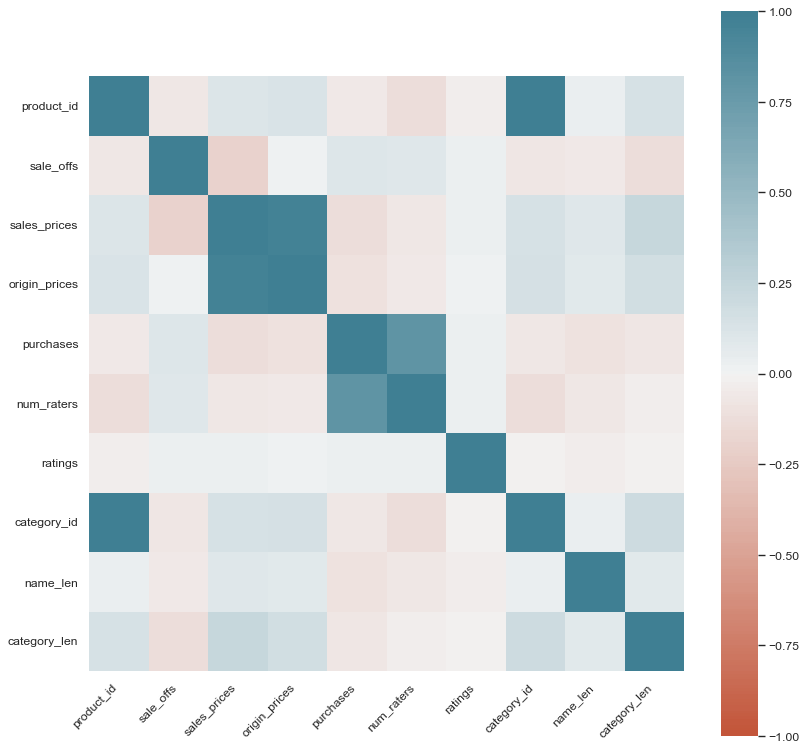

In [77]:
corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [78]:
# Tìm sự tương quan giữa các cột
# df_day_corr = df_day_eda.corr()
# df_hour_corr = df_hour_eda.corr()

<AxesSubplot:>

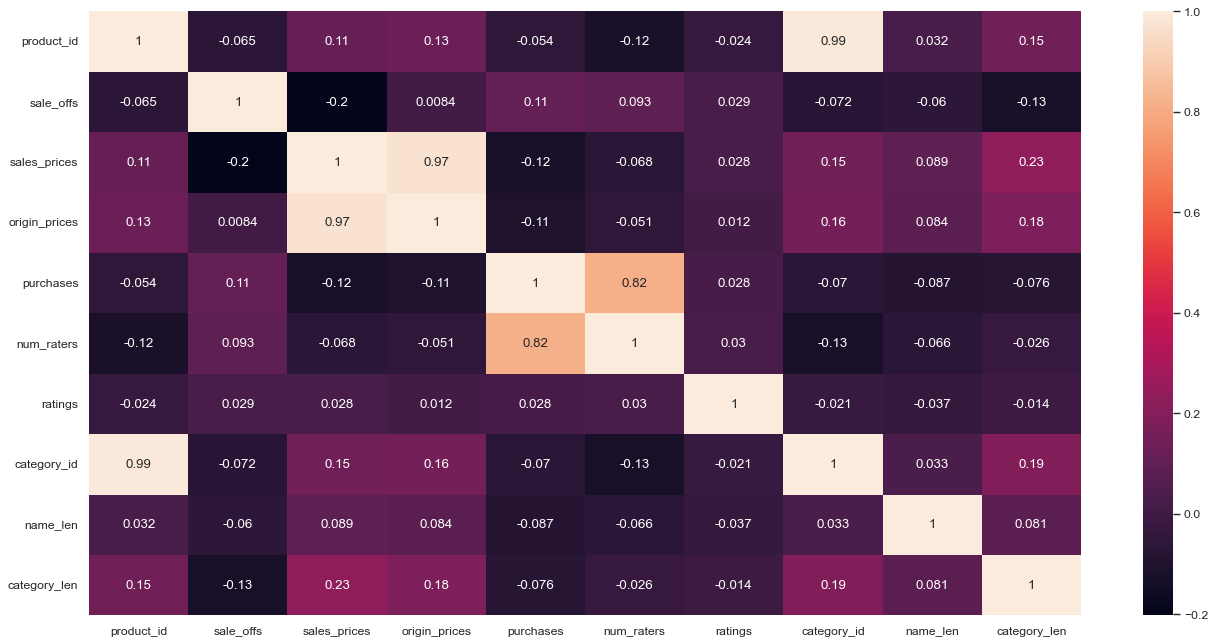

In [79]:
# Biểu diễn sự tương quan bằng heatmap
sns.heatmap(data.corr(), annot=True)

➡ 

### Pair plots

In [80]:
# sns.pairplot(data, hue='categories_str', height=1.5)

### Catplot

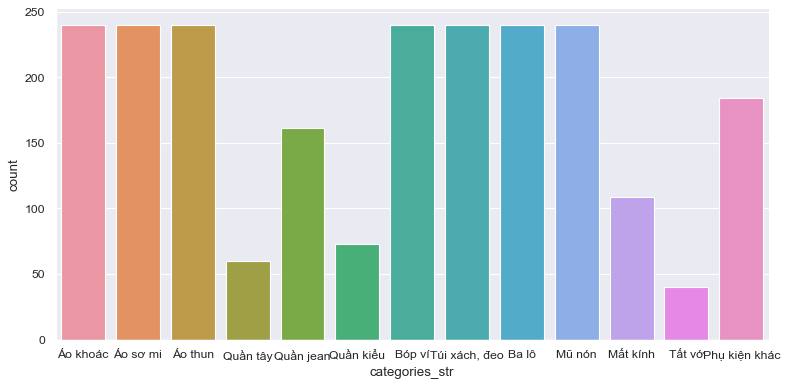

In [81]:
# Số lượng mặt hàng theo từng loại hàng
sns.catplot(x = "categories_str", data=data, aspect=2, kind="count")
# sns.factorplot(x = "categories_str", data=data, aspect=2, kind="count")

In [82]:
# data[['categories_str', 'category_id']].drop_duplicates()

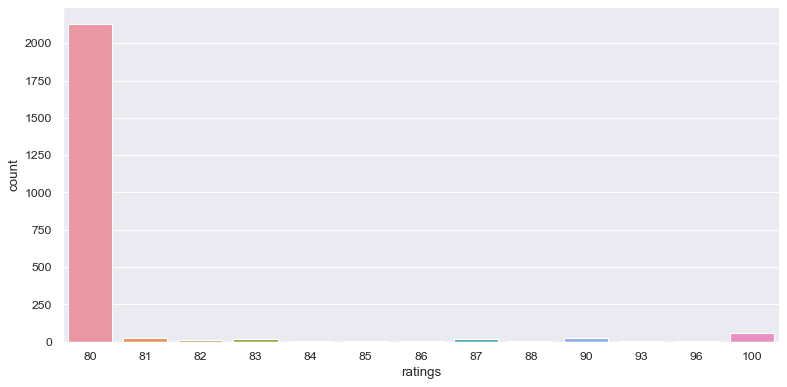

In [83]:
# Số lượng đánh giá theo từng cấp độ
sns.catplot(x = "ratings", data=data, aspect=2, kind="count")

### Histplot và Distplot

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_raters', ylabel='Density'>

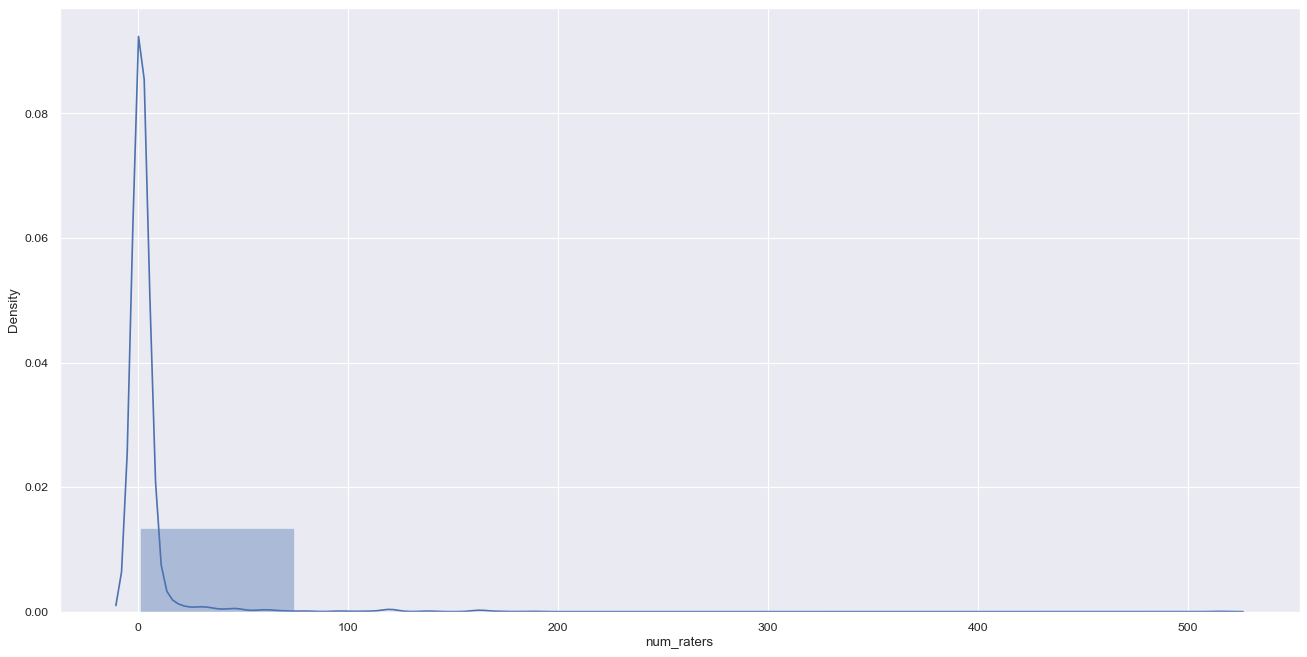

In [84]:
sns.distplot(data['num_raters'], bins= 7) # bins: chia ra thành bins cột

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='purchases', ylabel='Density'>

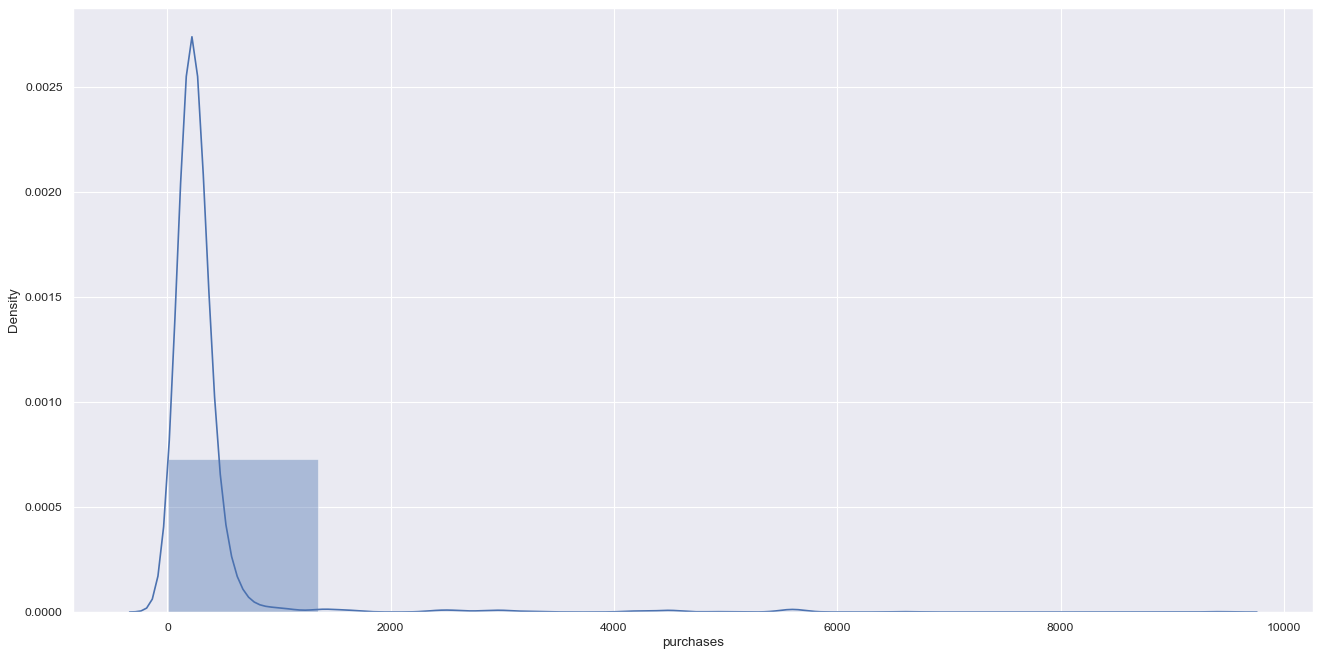

In [85]:
sns.distplot(data['purchases'], bins= 7) # bins: chia ra thành bins cột

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_offs', ylabel='Density'>

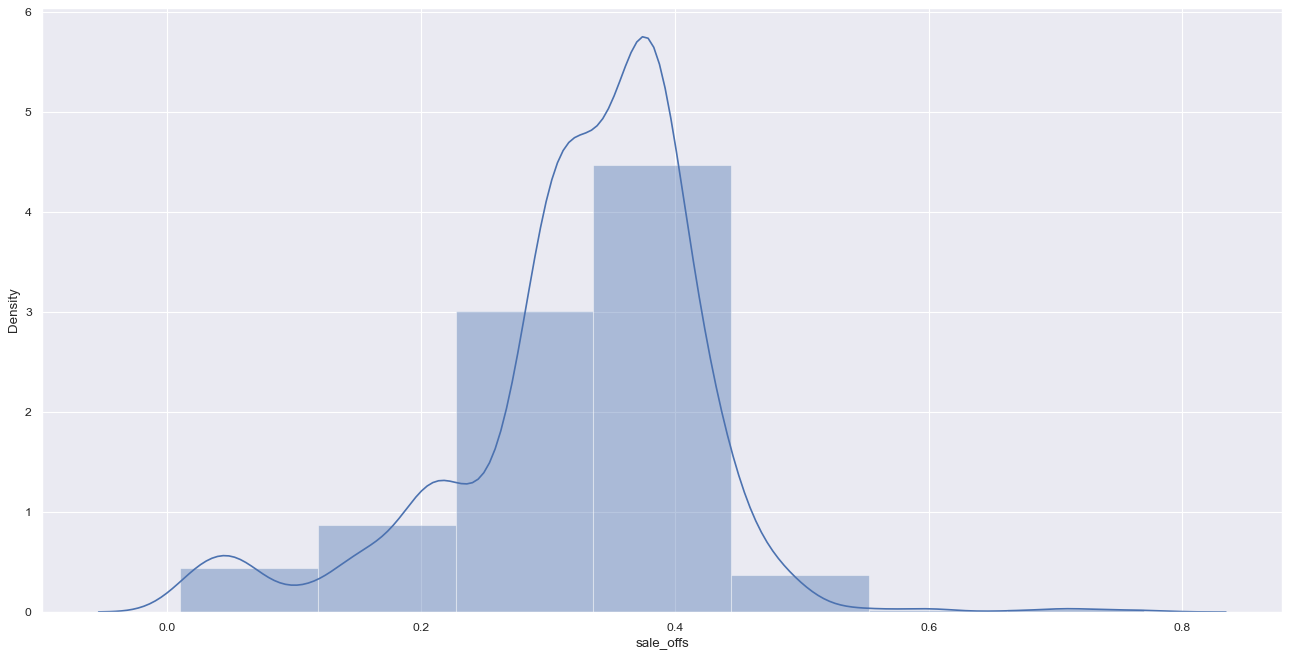

In [86]:
sns.distplot(data['sale_offs'], bins= 7) # bins: chia ra thành bins cột

### Joint distributions

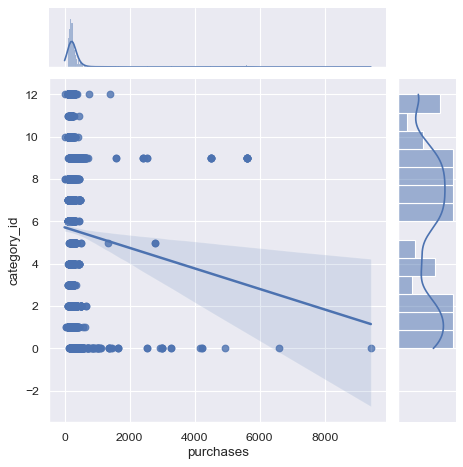

In [87]:
sns.jointplot(x= 'purchases', y= 'category_id', kind= 'reg', data= data)

### Heat map

In [88]:
data.corr()

,product_id,sale_offs,sales_prices,origin_prices,purchases,num_raters,ratings,category_id,name_len,category_len
product_id,1.000000,-0.065078,0.113797,0.127881,-0.054059,-0.120165,-0.024295,0.990905,0.031935,0.146681
sale_offs,-0.065078,1.000000,-0.202360,0.008441,0.108973,0.092614,0.028931,-0.071599,-0.059606,-0.126244
sales_prices,0.113797,-0.202360,1.000000,0.968440,-0.124511,-0.067795,0.027817,0.145103,0.089323,0.231031
origin_prices,0.127881,0.008441,0.968440,1.000000,-0.106129,-0.051493,0.012145,0.155129,0.083775,0.178336
purchases,-0.054059,0.108973,-0.124511,-0.106129,1.000000,0.816050,0.027518,-0.069601,-0.086967,-0.075967
num_raters,-0.120165,0.092614,-0.067795,-0.051493,0.816050,1.000000,0.029838,-0.125125,-0.066410,-0.026418
ratings,-0.024295,0.028931,0.027817,0.012145,0.027518,0.029838,1.000000,-0.021327,-0.037218,-0.014069
category_id,0.990905,-0.071599,0.145103,0.155129,-0.069601,-0.125125,-0.021327,1.000000,0.032651,0.188044
name_len,0.031935,-0.059606,0.089323,0.083775,-0.086967,-0.066410,-0.037218,0.032651,1.000000,0.081410
category_len,0.146681,-0.126244,0.231031,0.178336,-0.075967,-0.026418,-0.014069,0.188044,0.081410,1.000000


<AxesSubplot:>

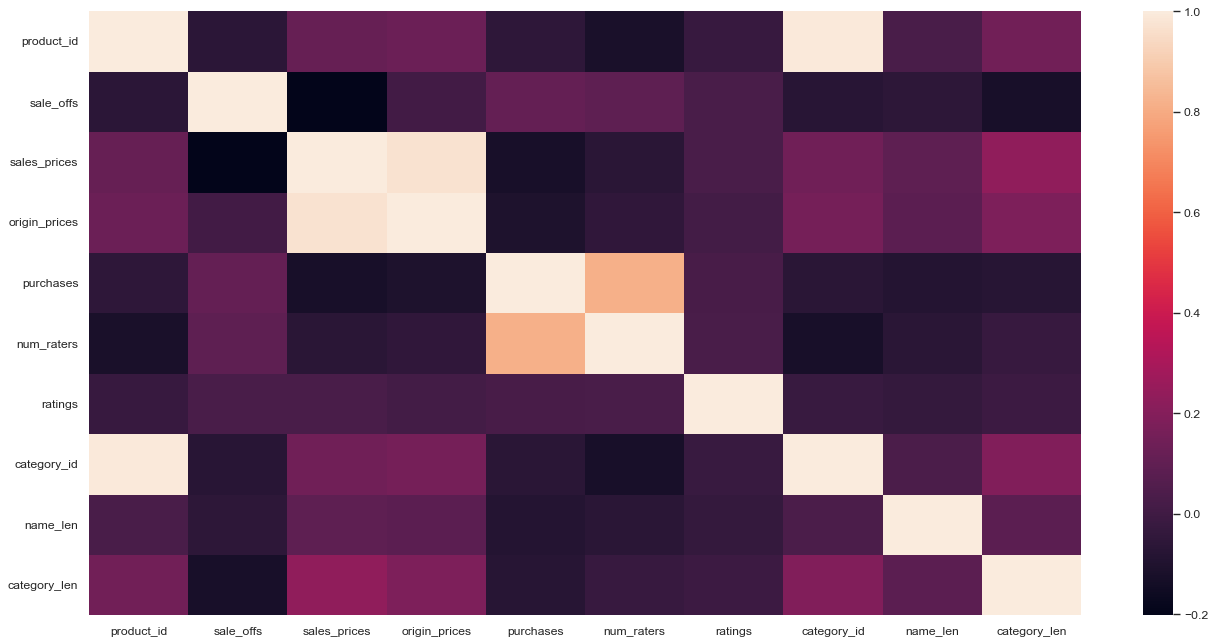

In [89]:
sns.heatmap(data.corr())

### Pie Char

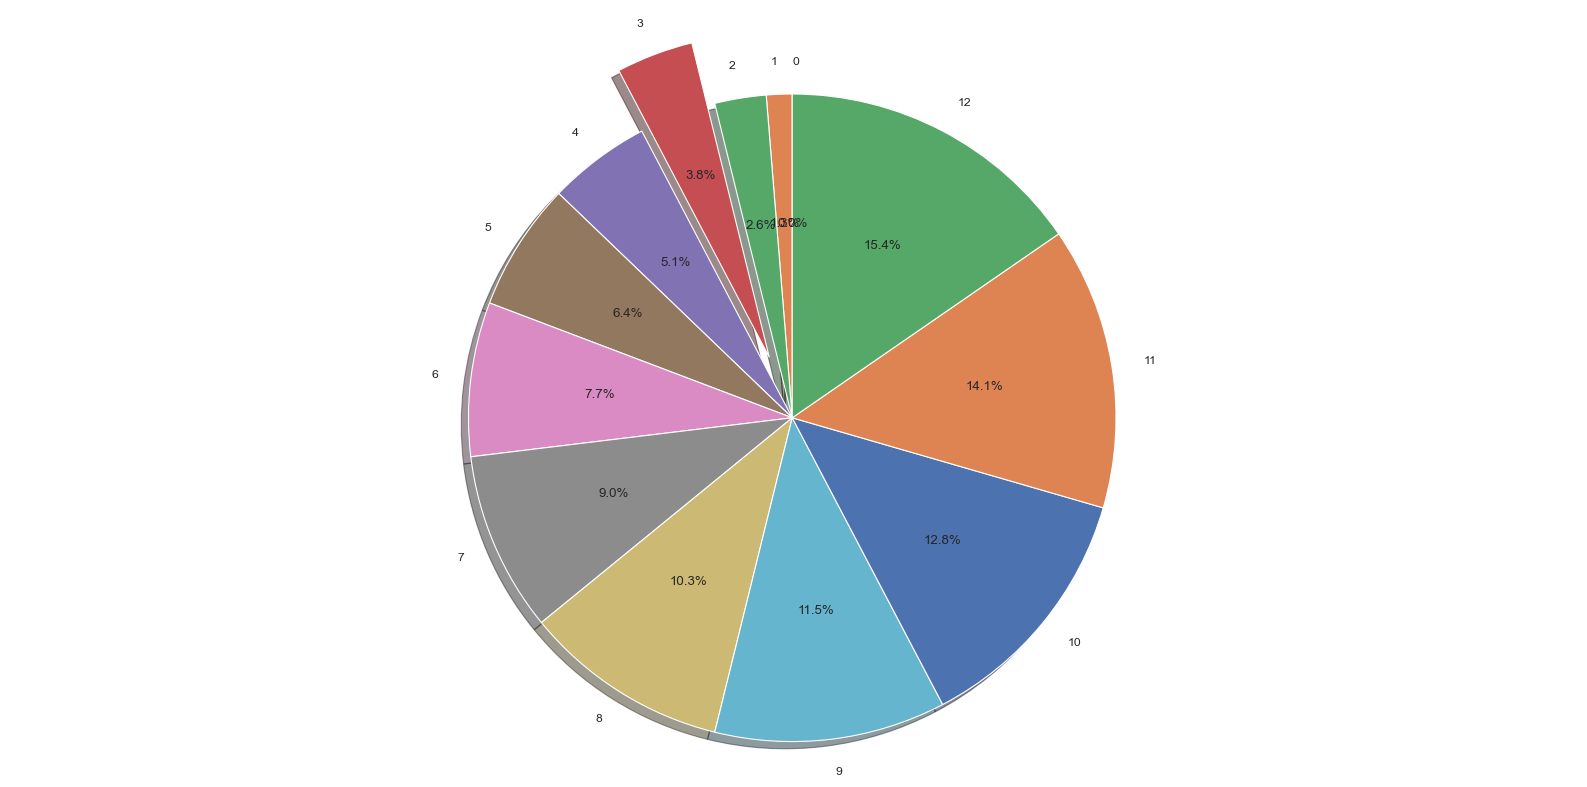

In [90]:
# Pie chart
labels = []
sizes = []
explode = []

labels = data['category_id'].value_counts().index.sort_values()
for index, size in enumerate(labels):
    sizes.append(size)
    if size==3:
        explode.append(0.2)
    else:
        explode.append(0)
 
_, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 1.6 Xử lý dữ liệu trống

In [91]:
data.isnull().sum()

product_id          0
product_names       0
sale_offs         402
sales_prices      402
origin_prices       0
purchases           0
num_raters          0
ratings             0
categories_str      0
category_id         0
name_len            0
category_len        0
dtype: int64

In [92]:
# mang du lieu da qua xu li du lieu trong va ngoai le
data_copy = data.copy()
# mang du lieu chua qua xu li du lieu trong va ngoai le
data_copy_non_pr = data.copy()

In [93]:
def get_std_before_and_after(method, before, after):    
# in ra do lech chuan truoc va sau khi dien du lieu trong
    print('***' + method + '***')
    print('before filled na: ' , before.std())
    print('after filled na: ' , after.std())

In [94]:
def probability_density_function(old_data, new_data):
    # ve ham mat do xac suat cua cot Age truoc va sau khi dien du lieu trong
    fig = plt.figure()
    ax = fig.add_subplot(111)
    old_data.plot(kind='kde', color='blue')
    new_data.plot(kind='kde', color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

0.32542782152230976
***Mean***
before filled na:  0.09693592574657901
after filled na:  0.08808228709480846


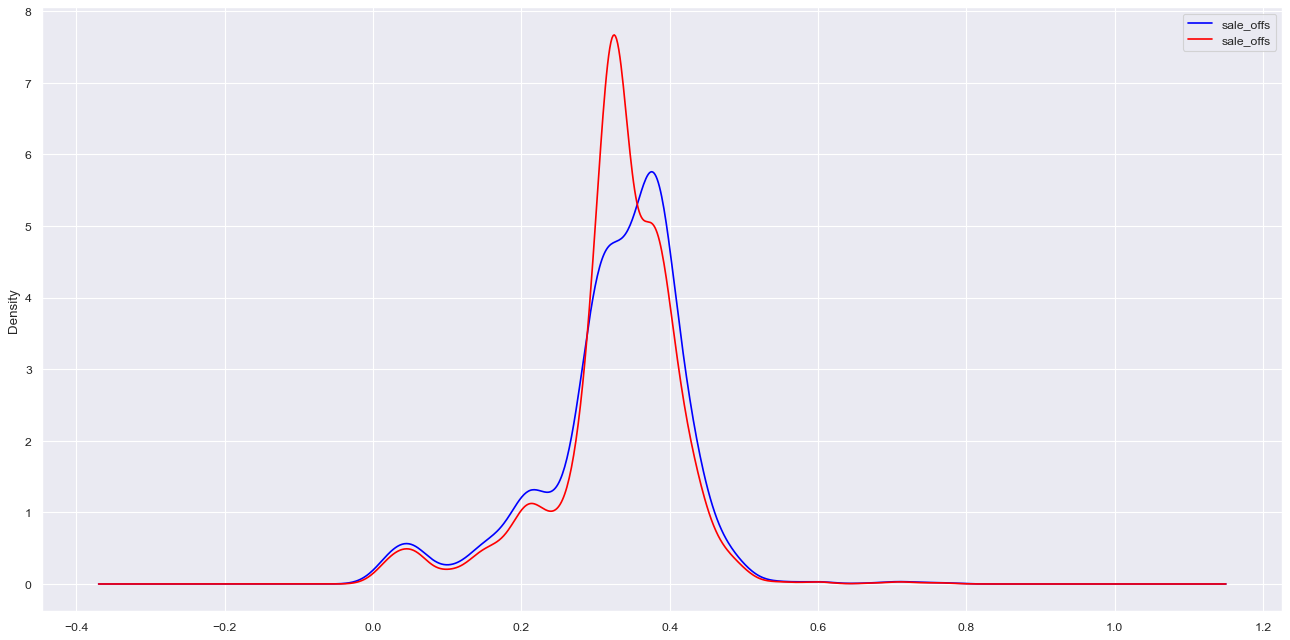

In [95]:
# chỉ cần thay đổi kĩ thuật xử lí
sale_offs_fixed = data_copy['sale_offs'].mean()
print(sale_offs_fixed)
data_copy['sale_offs'] = data_copy['sale_offs'].fillna(sale_offs_fixed)
probability_density_function(data['sale_offs'], data_copy['sale_offs'])
get_std_before_and_after('Mean',data['sale_offs'], data_copy['sale_offs'] )

252918.89763779528
***Median***
before filled na:  180385.7811812106
after filled na:  163910.25353554665


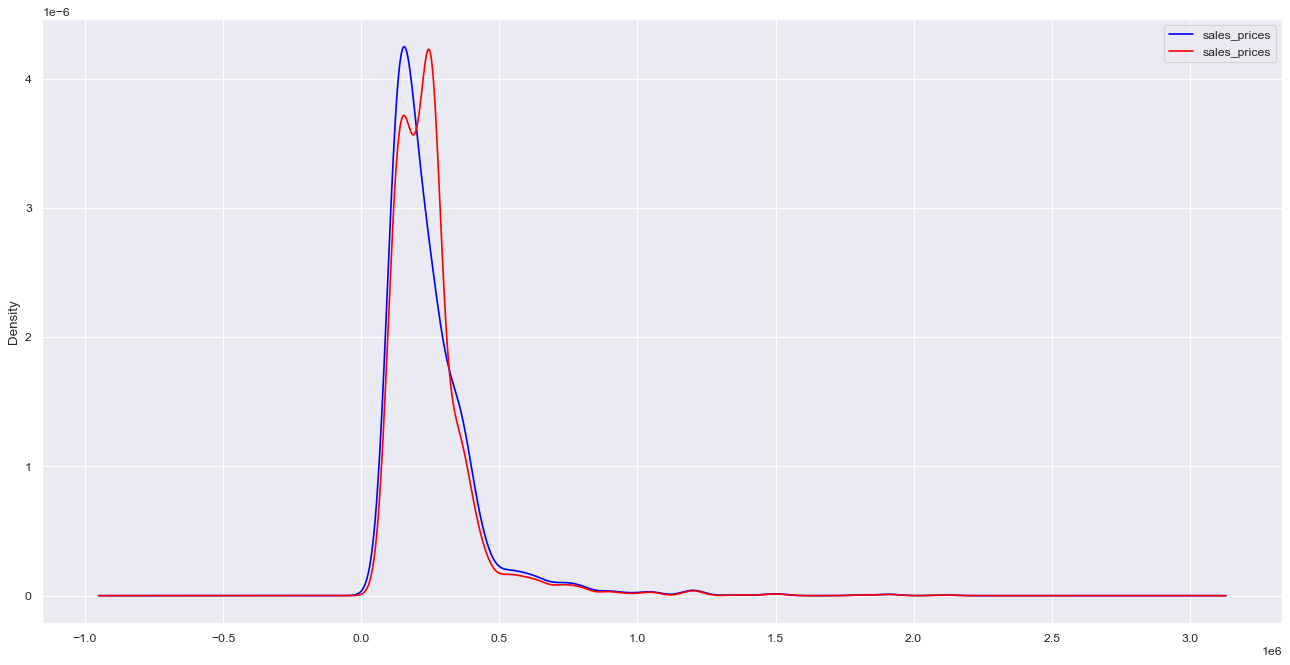

In [96]:
sales_prices_fixed = data_copy['sales_prices'].mean()
print(sales_prices_fixed)
data_copy['sales_prices'] = data_copy['sales_prices'].fillna(sales_prices_fixed)
probability_density_function(data['sales_prices'], data_copy['sales_prices'])
get_std_before_and_after('Median', data['sales_prices'], data_copy['sales_prices'] )

## 1.7 Xử lí dữ liệu ngoại lệ

In [97]:
# hàm vẽ histogram để nhận biết dạng phân bố
def histogram(data):
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
    n_bins=30
    ax0.hist(data['sale_offs'], n_bins,  histtype='bar')
    ax0.set_title('sale_offs')
    ax1.hist(data['sales_prices'], n_bins,  histtype='bar')
    ax1.set_title('sales_prices')
    ax2.hist(data['origin_prices'], n_bins, histtype='bar')
    ax2.set_title('origin_prices')
    ax3.hist(data['purchases'], n_bins , histtype='bar')
    ax3.set_title('purchases')
    # ax4.hist(data['num_raters'], n_bins , histtype='bar')
    # ax4.set_title('num_raters')
    # ax5.hist(data['ratings'], n_bins , histtype='bar')
    # ax5.set_title('ratings')

    fig.tight_layout()
    plt.show()

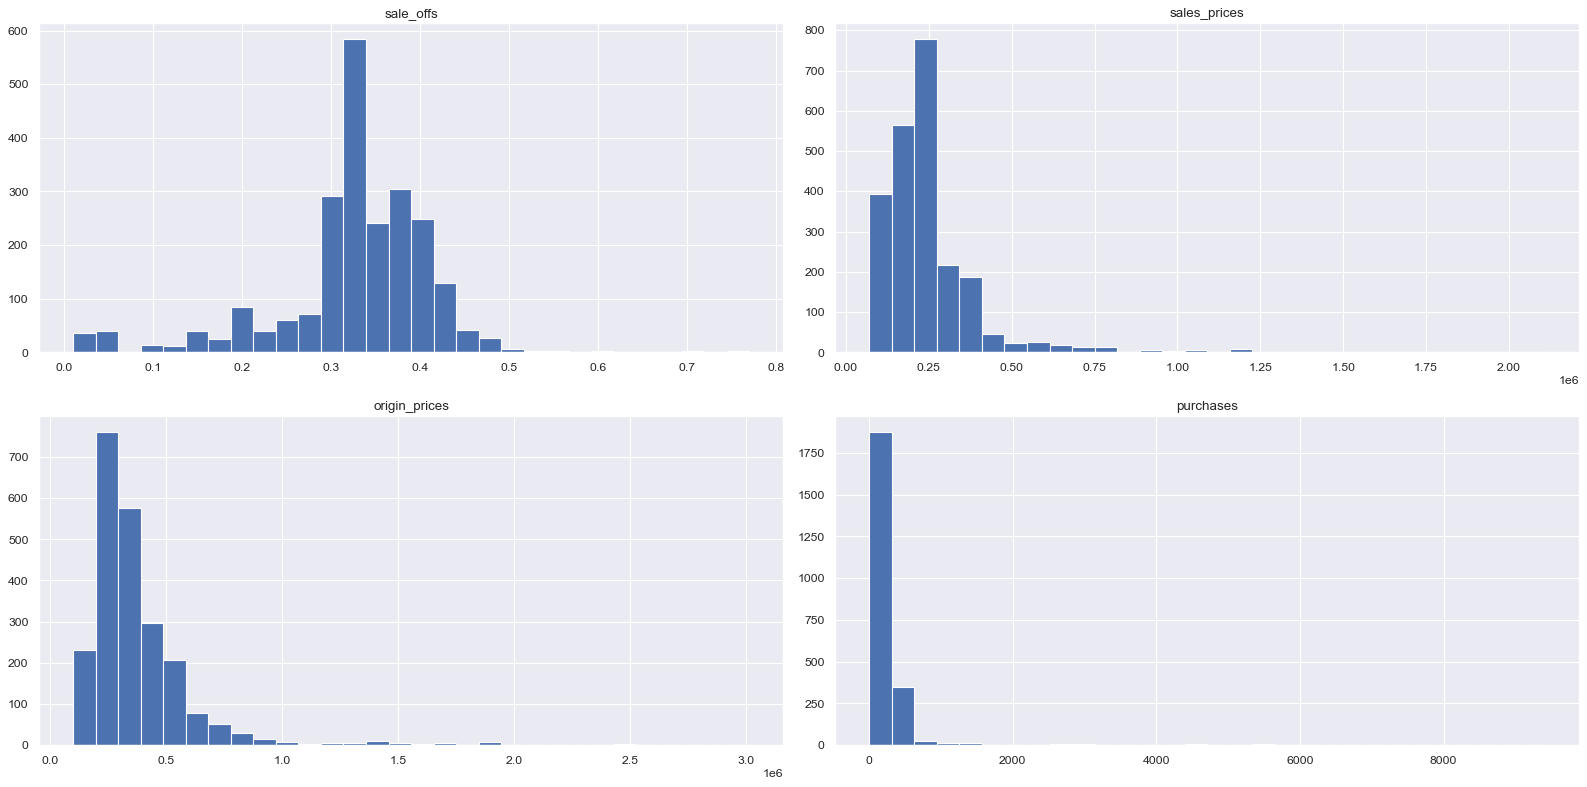

In [98]:
histogram(data_copy)

##### Dữ liệu của cột sale_offs có dạng phân bố chuẩn nên ta có: 
* ==> + Biên trên = GTTB + 3*Độ lệch chuẩn
* ==> + Biên dưới =  GTTB - 3*Độ lệch chuẩn

In [99]:
# Xử lý ngoại lệ cho cột sale_offs
ub_sale_offs = data_copy['sale_offs'].mean() + 3 * data_copy['sale_offs'].std()
lb_sale_offs = data_copy['sale_offs'].mean() - 3 * data_copy['sale_offs'].std()
print(ub_sale_offs)
print(lb_sale_offs)

0.5896746828067351
0.06118096023788433


##### Dữ liệu của cột sales_prices, origin_prices, purchases, num_raters, ratings có dạng phân bố lệch (skewed) nên ta có: 
* ==> + Biên trên = 3rd Quantile + 3*IQR
* ==> + Biên dưới =  1st Quantile - 3*IQR
* IQR: Interquantile range
    * 3rd Quantile = Percentile 75
    * 1st Quantile = Percentile 25

In [100]:
# Xử lý ngoại lệ cho cột sales_prices
IQR_sales_prices = data_copy['sales_prices'].quantile(0.75) - data_copy['sales_prices'].quantile(0.25)  
ub_sales_prices = data_copy['sales_prices'].quantile(0.75) + 3 * IQR_sales_prices 
lb_sales_prices = data_copy['sales_prices'].quantile(0.25) - 3 * IQR_sales_prices 
print(ub_sales_prices)
print(lb_sales_prices)

615000.0
-190000.0


In [101]:
# Xử lý ngoại lệ cho cột origin_prices
IQR_origin_prices = data_copy['origin_prices'].quantile(0.75) - data_copy['origin_prices'].quantile(0.25)  
ub_origin_prices = data_copy['origin_prices'].quantile(0.75) + 3 * IQR_origin_prices
lb_origin_prices = data_copy['origin_prices'].quantile(0.25) - 3 * IQR_origin_prices
print(ub_origin_prices)
print(lb_origin_prices)

1083000.0
-394000.0


In [102]:
# Xử lý ngoại lệ cho cột purchases
IQR_purchases = data_copy['purchases'].quantile(0.75) - data_copy['purchases'].quantile(0.25)  
ub_purchases = data_copy['purchases'].quantile(0.75) + 3 * IQR_purchases
lb_purchases = data_copy['purchases'].quantile(0.25) - 3 * IQR_purchases
print(ub_purchases)
print(lb_purchases)

600.0
-138.5


In [103]:
# # Xử lý ngoại lệ cho cột num_raters
# IQR_num_raters = data['num_raters'].quantile(0.75) - data['num_raters'].quantile(0.25)  
# ub_num_raters = data['num_raters'].quantile(0.75) + 3 * IQR_num_raters
# lb_num_raters = data['num_raters'].quantile(0.25) - 3 * IQR_num_raters
# print(ub_num_raters)
# print(lb_num_raters)

In [104]:
# # Xử lý ngoại lệ cho cột ratings
# IQR_ratings = data['ratings'].quantile(0.75) - data['ratings'].quantile(0.25)  
# ub_ratings = data['ratings'].quantile(0.75) + 3 * IQR_ratings
# lb_ratings = data['ratings'].quantile(0.25) - 3 * IQR_ratings
# print(ub_ratings)
# print(lb_ratings)

In [105]:
# Xác định các giá trị biên trên và biên dưới của dữ liệu
# Thay thế giá trị ngoại lệ bằng 1 trong 2 giá trị trên
data_copy.loc[data_copy['sale_offs'] >= ub_sale_offs, 'sale_offs'] = ub_sale_offs
data_copy.loc[data_copy['sales_prices'] >= ub_sales_prices, 'sales_prices'] = ub_sales_prices
data_copy.loc[data_copy['origin_prices'] >= ub_origin_prices, 'origin_prices'] = ub_origin_prices
data_copy.loc[data_copy['purchases'] >= ub_purchases, 'purchases'] = ub_purchases
# data_copy.loc[data_copy['num_raters'] >= ub_num_raters, 'num_raters'] = ub_num_raters
# data_copy.loc[data_copy['ratings'] >= ub_ratings, 'ratings'] = ub_ratings


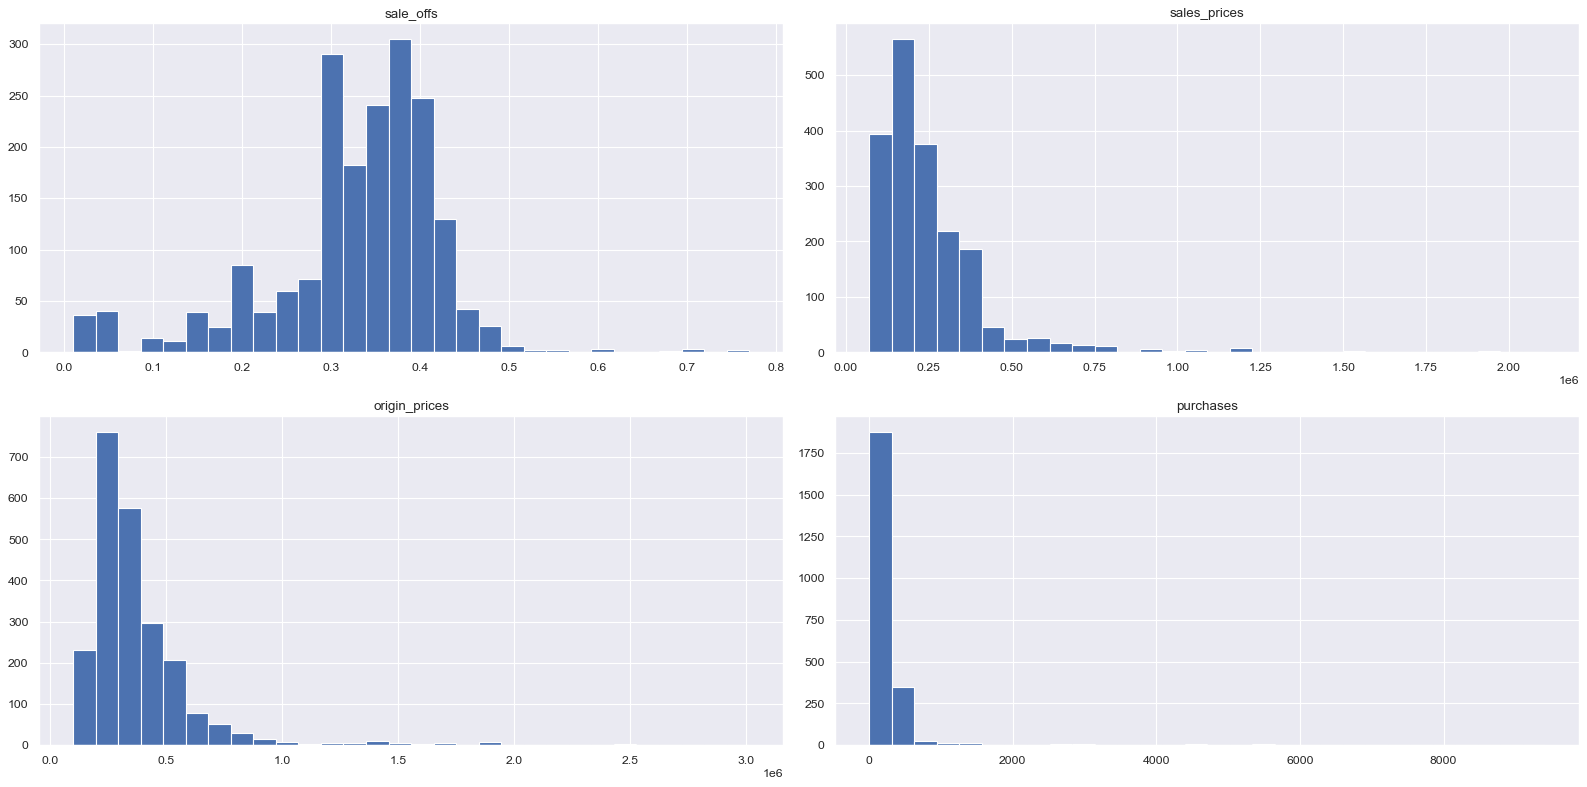

In [106]:
histogram(data_copy_non_pr)

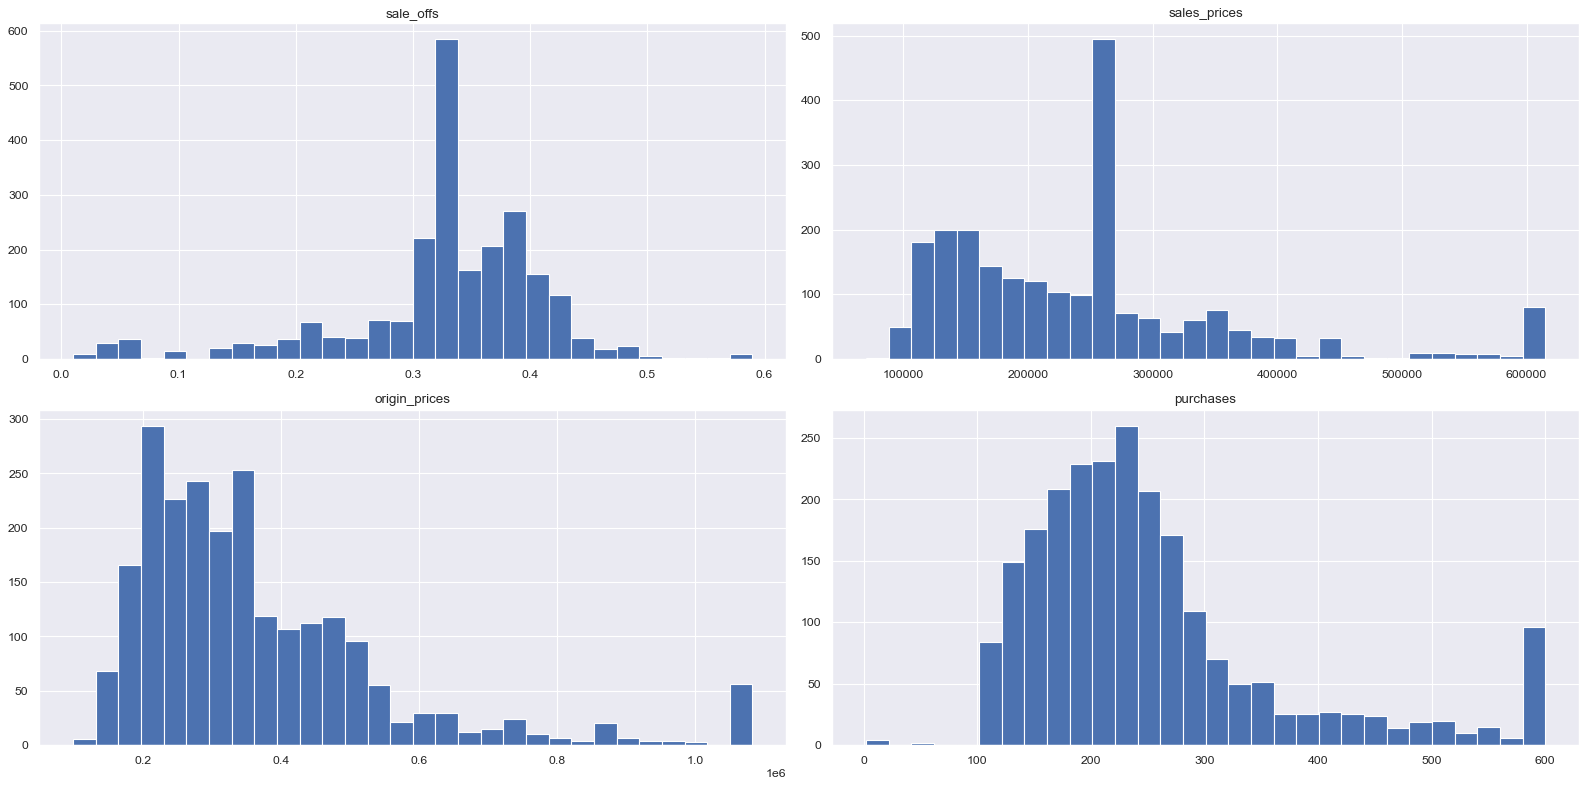

In [107]:
histogram(data_copy)

In [108]:
#export DataFrame to CSV file
data_copy.to_csv(r'clean_data.csv', index=False)

In [109]:
data_copy

,product_id,product_names,sale_offs,sales_prices,origin_prices,purchases,num_raters,ratings,categories_str,category_id,name_len,category_len
0,0,Áo khoác nam Akuba -3307 - Xanh,0.325428,252918.897638,520000,165,1,80,Áo khoác,0,31,8
1,1,Áo khoác Bomber Nam Nữ 1980 phong cách - Xanh đen,0.310000,165000.000000,239000,521,13,86,Áo khoác,0,49,8
2,2,Áo khoác nam nữ chống tia UV xám thể thao - A,0.290000,375000.000000,525000,180,4,80,Áo khoác,0,45,8
3,3,Áo khoác nam nữ AW phong cách - Đỏ đô,0.310000,165000.000000,239000,183,1,80,Áo khoác,0,37,8
4,4,Áo khoác unisex phối chữ cá tính - Trắng,0.340000,179000.000000,270000,326,3,87,Áo khoác,0,40,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2302,2302,Vòng tay đá mắt hổ đen 3 màu - Đen,0.325428,252918.897638,300000,134,1,80,Phụ kiện khác,12,34,13
2303,2303,Găng tay nam Monster cá tính - Xanh dương,0.325428,252918.897638,480000,209,1,80,Phụ kiện khác,12,41,13
2304,2304,Vòng tay trang sức mệnh Hỏa 1646 - Đỏ,0.350000,475000.000000,731000,193,1,80,Phụ kiện khác,12,37,13
2305,2305,Combo 2 cà vạt nam phong cách,0.400000,320000.000000,533000,112,1,80,Phụ kiện khác,12,29,13


In [110]:
data_eda_null = data_copy.isnull()

<AxesSubplot:>

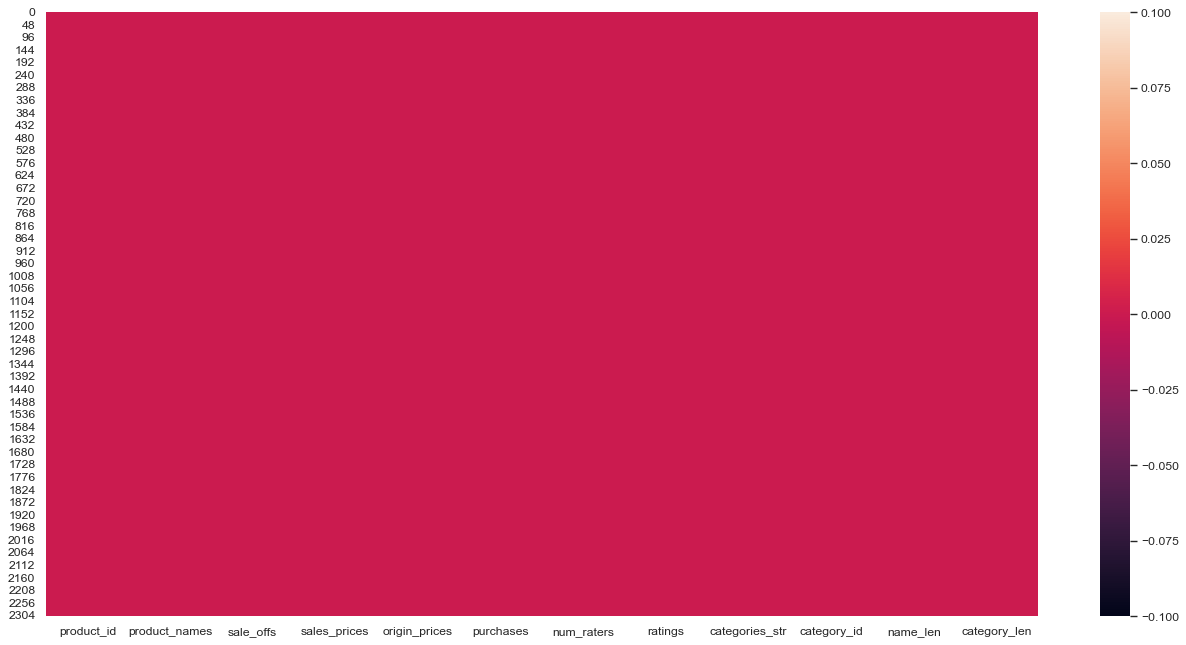

In [111]:
sns.heatmap(data_eda_null)

In [112]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax = data_copy.loc[:,['sales_prices','origin_prices','purchases']]
df_minmax=pd.DataFrame(min_max.fit_transform(df_minmax))
df_minmax.head()
data_copy['sales_prices_minmax'] = df_minmax[0]
data_copy['origin_prices_minmax'] = df_minmax[1]
data_copy['purchases_minmax'] = df_minmax[2]

In [113]:
df_minmax

,0,1,2
0,0.335631,0.427846,0.272575
1,0.174312,0.142276,0.867893
2,0.559633,0.432927,0.297659
3,0.174312,0.142276,0.302676
4,0.200000,0.173780,0.541806
...,...,...,...
2302,0.335631,0.204268,0.220736
2303,0.335631,0.387195,0.346154
2304,0.743119,0.642276,0.319398
2305,0.458716,0.441057,0.183946


In [114]:
data_copy

,product_id,product_names,sale_offs,sales_prices,origin_prices,purchases,num_raters,ratings,categories_str,category_id,name_len,category_len,sales_prices_minmax,origin_prices_minmax,purchases_minmax
0,0,Áo khoác nam Akuba -3307 - Xanh,0.325428,252918.897638,520000,165,1,80,Áo khoác,0,31,8,0.335631,0.427846,0.272575
1,1,Áo khoác Bomber Nam Nữ 1980 phong cách - Xanh đen,0.310000,165000.000000,239000,521,13,86,Áo khoác,0,49,8,0.174312,0.142276,0.867893
2,2,Áo khoác nam nữ chống tia UV xám thể thao - A,0.290000,375000.000000,525000,180,4,80,Áo khoác,0,45,8,0.559633,0.432927,0.297659
3,3,Áo khoác nam nữ AW phong cách - Đỏ đô,0.310000,165000.000000,239000,183,1,80,Áo khoác,0,37,8,0.174312,0.142276,0.302676
4,4,Áo khoác unisex phối chữ cá tính - Trắng,0.340000,179000.000000,270000,326,3,87,Áo khoác,0,40,8,0.200000,0.173780,0.541806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,2302,Vòng tay đá mắt hổ đen 3 màu - Đen,0.325428,252918.897638,300000,134,1,80,Phụ kiện khác,12,34,13,0.335631,0.204268,0.220736
2303,2303,Găng tay nam Monster cá tính - Xanh dương,0.325428,252918.897638,480000,209,1,80,Phụ kiện khác,12,41,13,0.335631,0.387195,0.346154
2304,2304,Vòng tay trang sức mệnh Hỏa 1646 - Đỏ,0.350000,475000.000000,731000,193,1,80,Phụ kiện khác,12,37,13,0.743119,0.642276,0.319398
2305,2305,Combo 2 cà vạt nam phong cách,0.400000,320000.000000,533000,112,1,80,Phụ kiện khác,12,29,13,0.458716,0.441057,0.183946


In [115]:
X = data_copy.drop(['product_id','product_names','ratings','categories_str','category_id','name_len','category_len'], axis=1)
y = data_copy['ratings']
X.shape, y.shape

((2307, 8), (2307,))

In [116]:
select = SelectKBest(score_func=chi2, k=7)
z = select.fit_transform(X,y)

In [117]:
print("After selecting best features:", z.shape) 

After selecting best features: (2307, 7)


In [118]:
filter = select.get_support()
features = array(X.columns)
 
print("All features:", end =" ")
print(features)
 
print("Selected best:",end =" ")
print(features[filter])

All features: ['sale_offs' 'sales_prices' 'origin_prices' 'purchases' 'num_raters'
 'sales_prices_minmax' 'origin_prices_minmax' 'purchases_minmax']
Selected best: ['sales_prices' 'origin_prices' 'purchases' 'num_raters'
 'sales_prices_minmax' 'origin_prices_minmax' 'purchases_minmax']


In [119]:
# !pip install smogn

In [120]:
# import smogn

In [121]:
# Creating dummy variables for the categorical features(One Hot Encoding)
categorycols=['category_id']
dt = pd.get_dummies(data_copy, columns = categorycols,drop_first=True)
dt


,product_id,product_names,sale_offs,sales_prices,origin_prices,purchases,num_raters,ratings,categories_str,name_len,category_len,sales_prices_minmax,origin_prices_minmax,purchases_minmax,category_id_1,category_id_2,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,category_id_9,category_id_10,category_id_11,category_id_12
0,0,Áo khoác nam Akuba -3307 - Xanh,0.325428,252918.897638,520000,165,1,80,Áo khoác,31,8,0.335631,0.427846,0.272575,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Áo khoác Bomber Nam Nữ 1980 phong cách - Xanh đen,0.310000,165000.000000,239000,521,13,86,Áo khoác,49,8,0.174312,0.142276,0.867893,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Áo khoác nam nữ chống tia UV xám thể thao - A,0.290000,375000.000000,525000,180,4,80,Áo khoác,45,8,0.559633,0.432927,0.297659,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Áo khoác nam nữ AW phong cách - Đỏ đô,0.310000,165000.000000,239000,183,1,80,Áo khoác,37,8,0.174312,0.142276,0.302676,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Áo khoác unisex phối chữ cá tính - Trắng,0.340000,179000.000000,270000,326,3,87,Áo khoác,40,8,0.200000,0.173780,0.541806,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,2302,Vòng tay đá mắt hổ đen 3 màu - Đen,0.325428,252918.897638,300000,134,1,80,Phụ kiện khác,34,13,0.335631,0.204268,0.220736,0,0,0,0,0,0,0,0,0,0,0,1
2303,2303,Găng tay nam Monster cá tính - Xanh dương,0.325428,252918.897638,480000,209,1,80,Phụ kiện khác,41,13,0.335631,0.387195,0.346154,0,0,0,0,0,0,0,0,0,0,0,1
2304,2304,Vòng tay trang sức mệnh Hỏa 1646 - Đỏ,0.350000,475000.000000,731000,193,1,80,Phụ kiện khác,37,13,0.743119,0.642276,0.319398,0,0,0,0,0,0,0,0,0,0,0,1
2305,2305,Combo 2 cà vạt nam phong cách,0.400000,320000.000000,533000,112,1,80,Phụ kiện khác,29,13,0.458716,0.441057,0.183946,0,0,0,0,0,0,0,0,0,0,0,1


In [122]:
dt['sale_offs_boxcox'],parameters=stat.boxcox(dt['sale_offs']+1)
dt['sales_prices_minmax_boxcox'],parameters=stat.boxcox(dt['sales_prices_minmax']+1)
dt['origin_prices_minmax_boxcox'],parameters=stat.boxcox(dt['origin_prices_minmax']+1)
dt['purchases_minmax_boxcox'],parameters=stat.boxcox(dt['purchases_minmax']+1)

In [123]:
X = dt.drop(['product_id','product_names','ratings','categories_str','name_len','category_len','num_raters','sales_prices','origin_prices','purchases'], axis=1)
y = dt['ratings']
X.shape, y.shape

((2307, 20), (2307,))

In [124]:
X

,sale_offs,sales_prices_minmax,origin_prices_minmax,purchases_minmax,category_id_1,category_id_2,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,category_id_9,category_id_10,category_id_11,category_id_12,sale_offs_boxcox,sales_prices_minmax_boxcox,origin_prices_minmax_boxcox,purchases_minmax_boxcox
0,0.325428,0.335631,0.427846,0.272575,0,0,0,0,0,0,0,0,0,0,0,0,0.615780,0.206982,0.201918,0.168724
1,0.310000,0.174312,0.142276,0.867893,0,0,0,0,0,0,0,0,0,0,0,0,0.569541,0.132707,0.105976,0.272564
2,0.290000,0.559633,0.432927,0.297659,0,0,0,0,0,0,0,0,0,0,0,0,0.512739,0.270188,0.202912,0.177564
3,0.310000,0.174312,0.142276,0.302676,0,0,0,0,0,0,0,0,0,0,0,0,0.569541,0.132707,0.105976,0.179248
4,0.340000,0.200000,0.173780,0.541806,0,0,0,0,0,0,0,0,0,0,0,0,0.661465,0.146894,0.122130,0.235923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,0.325428,0.335631,0.204268,0.220736,0,0,0,0,0,0,0,0,0,0,0,1,0.615780,0.206982,0.135989,0.147970
2303,0.325428,0.335631,0.387195,0.346154,0,0,0,0,0,0,0,0,0,0,0,1,0.615780,0.206982,0.193350,0.192774
2304,0.350000,0.743119,0.642276,0.319398,0,0,0,0,0,0,0,0,0,0,0,1,0.693980,0.302763,0.232959,0.184670
2305,0.400000,0.458716,0.441057,0.183946,0,0,0,0,0,0,0,0,0,0,0,1,0.871581,0.245843,0.204469,0.130861


In [125]:
regr = RandomForestRegressor(random_state=42)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
X_train.shape

(1614, 20)

In [127]:
score = cross_val_score(regr, X_train.to_numpy(), y_train.to_numpy())
print(score.mean())

0.45664359780505254


In [128]:
regr.fit(X_train, y_train)
pred_reg = regr.predict(X_test)

print(
    'Test R2 SCORE:', r2_score(y_test, pred_reg).round(3),
    '\nTest RMSE:', np.sqrt(mean_squared_error(y_test, pred_reg)).round(3),
    '\nTest MAE:', mean_absolute_error(y_test, pred_reg).round(3),
    )

Test R2 SCORE: 0.487 
Test RMSE: 2.165 
Test MAE: 0.657


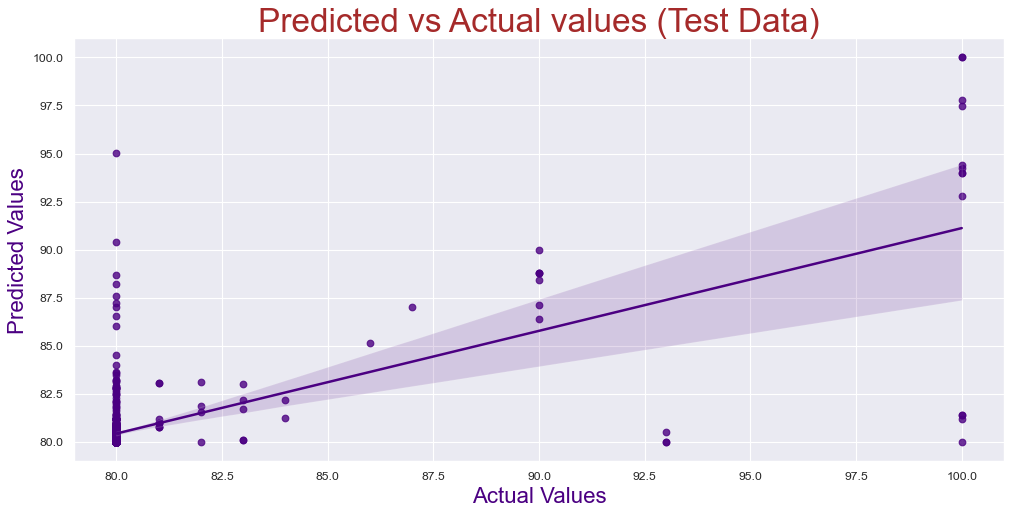

In [129]:
plt.figure(figsize = (15,7))
sns.regplot(x=y_test, y=pred_reg, color='indigo')
plt.title ('Predicted vs Actual values (Test Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='indigo')
plt.ylabel("Predicted Values", fontsize=20, color='indigo')
plt.show()

In [130]:
random_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
               'max_features': ['auto', 'sqrt'],
               'max_depth':  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [131]:
# Parameter tuning
rfm=RandomizedSearchCV(regr,random_grid,cv=3,n_iter=100,verbose=2,random_state=42)
rfm.fit(X_train,y_train)
rfm.best_score_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   6.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   6.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   6.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.3s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.7s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.9s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   9.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   9.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   9.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   3.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   4.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   4.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   5.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   5.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   5.5s
[CV] END bootstrap=False, max_depth=70,

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  13.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  15.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  14.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   4.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   4.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   3.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  17.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  17.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  15.9s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  18.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  20.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  16.8s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  17.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  18.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  16.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   3.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END bootstrap=False, max_depth=

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  13.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  11.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   5.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   5.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   4.9s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.3s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.4s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   6.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   7.1s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   6.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   5.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   5.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   5.2s
[CV] END bootstrap=False, max_depth=None,

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  16.9s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  19.6s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  17.7s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.7s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.8s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.9s
[CV] END bootstrap=True, max_depth=10

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   3.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   3.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.9s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   5.9s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   6.7s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   5.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.8s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.1s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  20.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  20.8s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  16.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   6.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   7.9s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   7.1s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.9s
[CV] END bootstrap=False, max_depth

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   7.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   7.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   6.8s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.9s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   4.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   4.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   4.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.6s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   6.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   7.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   5.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   4.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   4.8s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   4.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.6s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   8.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  20.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  20.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  15.9s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  12.1s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  13.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  12.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.8s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   4.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   4.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  21.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  21.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  19.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=  15.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=  13.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=  12.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  14.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  14.9s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  15.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  12.9s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  13.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  12.4s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   6.8s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   7.3s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   6.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  21.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  19.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  17.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   2.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   3.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   3.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  15.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  14.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  14.8s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   4.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   5.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   5.8s
[CV] END bootstrap=True, max_de

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   3.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   4.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   4.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   8.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   9.1s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   8.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  17.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  19.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  18.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   5.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   6.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   5.8s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   4.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   4.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.9s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   7.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   5.6s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   6.6s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.9s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.3s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.8s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.8s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.1s
[CV] END bootstrap=False, max_depth=100

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=  12.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=  13.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=  12.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  16.8s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  20.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  17.5s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  11.1s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   9.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   3.6s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   5.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   3.8s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  12.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  13.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  15.8s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  17.9s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  18.6s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  15.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   2.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   6.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   5.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   5.1s
[CV] END bootstrap=False, max_depth=

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   7.6s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   8.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   9.1s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   6.1s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   5.5s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   6.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  10.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  16.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  15.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  14.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   5.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   5.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   5.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  10.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  13.0s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  11.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   6.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   6.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   6.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  12.9s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  15.6s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   4.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   4.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   4.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.5s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.4s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.6s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.6s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.1s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   6.2s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   5.7s


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   5.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   4.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   4.3s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   4.1s


0.38969033340320625

In [132]:
pd.DataFrame(rfm.cv_results_)[["mean_score_time", "params", "mean_test_score", "rank_test_score"]]

,mean_score_time,params,mean_test_score,rank_test_score
0,0.410556,"{'n_estimators': 2000, 'min_samples_split': 10...",0.282403,51
1,0.275572,"{'n_estimators': 1200, 'min_samples_split': 2,...",0.339720,27
2,0.288227,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.308655,41
3,0.047231,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.337406,30
4,0.343067,"{'n_estimators': 1200, 'min_samples_split': 10...",0.290382,49
...,...,...,...,...
95,0.281263,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.232946,71
96,0.049560,"{'n_estimators': 200, 'min_samples_split': 10,...",0.280898,54
97,0.228739,"{'n_estimators': 1000, 'min_samples_split': 2,...",-0.087823,93
98,0.125983,"{'n_estimators': 600, 'min_samples_split': 10,...",-0.074359,92


In [158]:
regr = RandomForestRegressor(n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=70, bootstrap=False, random_state=42)

In [159]:
score = cross_val_score(regr, X_train.to_numpy(), y_train.to_numpy())
print(score.mean())

0.44344284536154327


In [160]:
regr.fit(X_train, y_train)
pred_reg = regr.predict(X_test)

print(
    'Test R2 SCORE:', r2_score(y_test, pred_reg).round(3),
    '\nTest RMSE:', np.sqrt(mean_squared_error(y_test, pred_reg)).round(3),
    '\nTest MAE:', mean_absolute_error(y_test, pred_reg).round(3),
    )

Test R2 SCORE: 0.499 
Test RMSE: 2.14 
Test MAE: 0.483


In [161]:
print(pred_reg)

[ 80.          80.1         80.          80.0021875   80.
  80.          80.00125     80.          80.          80.
  80.          80.05        80.0975      82.5009375   80.
  80.          80.          80.69875     80.          80.
  80.          80.          80.125       80.          80.
  80.625       80.          80.          80.          80.
  80.          80.025       80.          80.          80.
 100.          80.          80.          80.          80.
  80.          80.          80.          80.71125     80.575
  80.          80.          80.          80.          80.23375
  80.          80.          80.07125     80.          80.
  80.          81.1275      80.          80.          80.76625
  80.4075      80.          80.          80.          83.
 100.          80.00416667  80.05        80.          80.025
  81.095       80.14        80.          80.          80.
  80.          80.         100.          80.65125     80.03875
  80.          81.0009375   80.          80.       

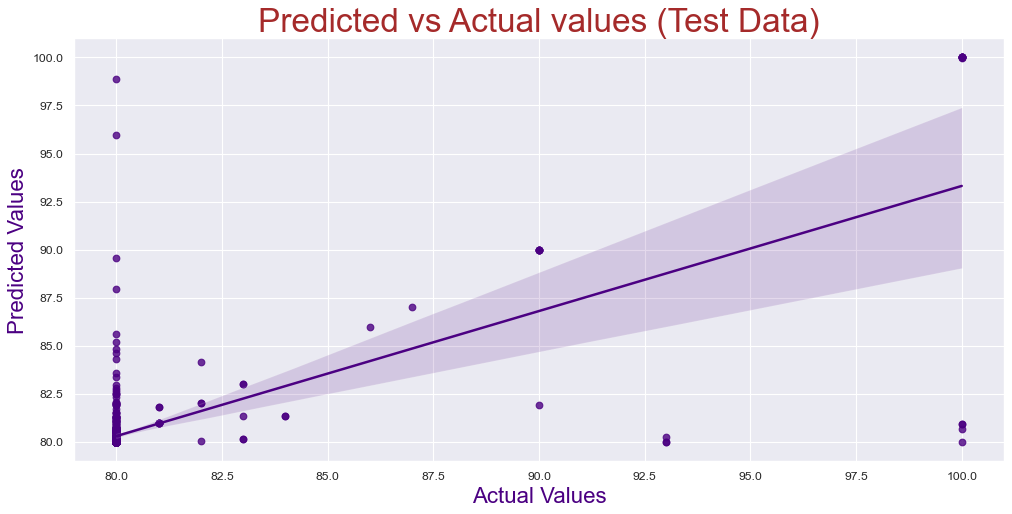

In [136]:
plt.figure(figsize = (15,7))
sns.regplot(x=y_test, y=pred_reg, color='indigo')
plt.title ('Predicted vs Actual values (Test Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='indigo')
plt.ylabel("Predicted Values", fontsize=20, color='indigo')
plt.show()

In [162]:
from sklearn import linear_model

In [163]:
regr = linear_model.LinearRegression()
# regr.fit(X, y)

In [164]:
score = cross_val_score(regr, X_train.to_numpy(), y_train.to_numpy())
print(score.mean())

0.005389496796745119


In [165]:
regr.fit(X_train, y_train)
pred_reg = regr.predict(X_test)

print(
    'Test R2 SCORE:', r2_score(y_test, pred_reg).round(3),
    '\nTest RMSE:', np.sqrt(mean_squared_error(y_test, pred_reg)).round(3),
    '\nTest MAE:', mean_absolute_error(y_test, pred_reg).round(3),
    )

Test R2 SCORE: 0.001 
Test RMSE: 3.022 
Test MAE: 1.386


In [169]:
d1 = {'True Labels': y_test, 'Predicted Labels': pred_reg}
SK = pd.DataFrame(data=d1)
print(SK)


      True Labels  Predicted Labels
1641           80         77.212167
509            80         80.350171
1859           80         81.364903
44             80         81.124882
1656           80         78.963912
...           ...               ...
1442           80         79.893025
2045           80         80.251931
1719           80         80.479462
736            80         80.694399
344            80         79.597145

[693 rows x 2 columns]


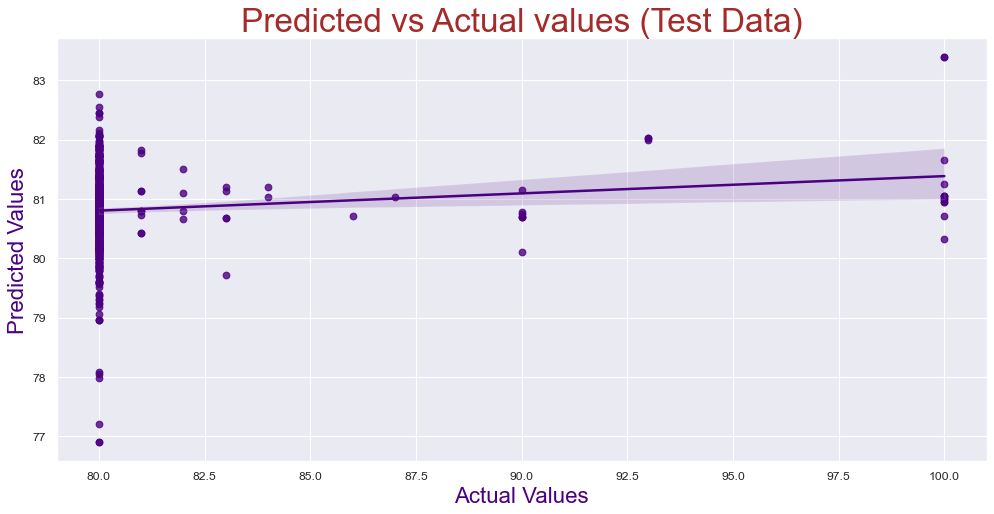

In [141]:
plt.figure(figsize = (15,7))
sns.regplot(x=y_test, y=pred_reg, color='indigo')
plt.title ('Predicted vs Actual values (Test Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='indigo')
plt.ylabel("Predicted Values", fontsize=20, color='indigo')
plt.show()

In [142]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

In [ ]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv','scores'])
import time
for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)

    # score = cross_val_score(regr, X_train.to_numpy(), y_train.to_numpy())
    # print(score.mean())
    y_pred = model.predict(X_test)
    # print(
    # 'Test R2 SCORE:', r2_score(y_test, pred_reg).round(3),
    # '\nTest RMSE:', np.sqrt(mean_squared_error(y_test, pred_reg)).round(3),
    # '\nTest MAE:', mean_absolute_error(y_test, pred_reg).round(3),
    # )
    scores = cross_val_score(model, 
                             X_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred))),
           'rmse_cv': round(np.mean(np.sqrt(-scores))),
           'scores': round(np.mean(-scores)),
    }

    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor
[13:40:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:40:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:40:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:40:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:40:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

* HuberRegressor


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_ite

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

In [ ]:
df_models.head(20).sort_values(by='rmse_cv', ascending=True)

,model,run_time,rmse,rmse_cv,scores
1,RandomForestRegressor,0.1,2,2,7
0,XGBRegressor,0.02,3,3,9
15,BayesianRidge,0.0,3,3,12
14,ARDRegression,0.01,3,3,12
9,Ridge,0.0,3,3,12
16,ElasticNet,0.0,3,3,12
8,LinearRegression,0.0,3,3,12
2,DecisionTreeRegressor,0.0,3,3,9
17,OrthogonalMatchingPursuit,0.0,3,3,12
5,NuSVR,0.17,3,4,13


In [ ]:
#model tốt nhất
regressor = GaussianProcessRegressor()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

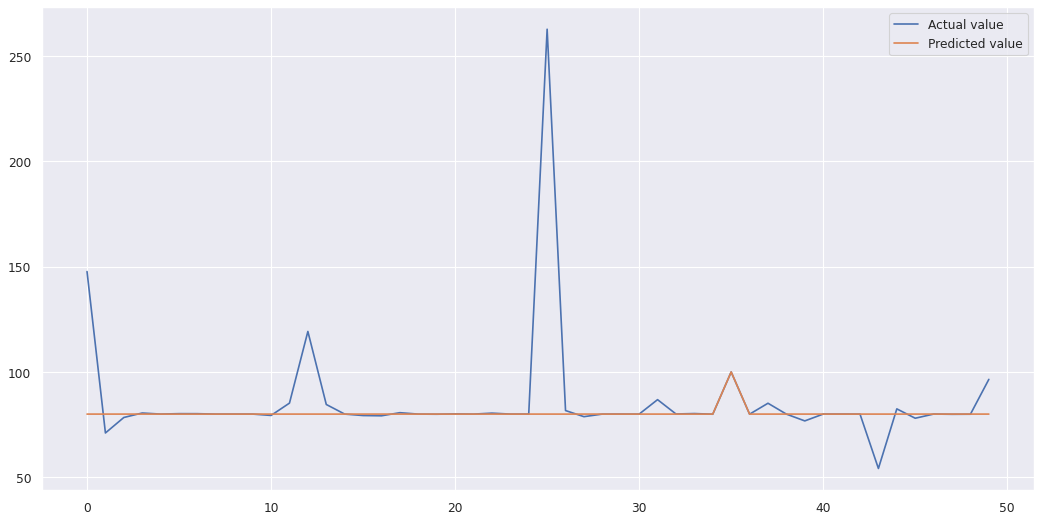

In [ ]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])